качаем библиотеки

In [1]:
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

#### Проект
Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [4]:
### для загрузки данных
with open(r'project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

**Задача 1**<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

In [15]:
import numpy as np
from scipy import stats

# Среднее арифметическое
mean_product1 = np.mean(product1)
mean_product2 = np.mean(product2)

# Медиана
median_product1 = np.median(product1)
median_product2 = np.median(product2)

# Мода
mode_product1_result = stats.mode(product1)
mode_product2_result = stats.mode(product2)

# Результаты
print(f"Для продукта 1:")
print(f"Среднее: {mean_product1:.2f}")
print(f"Медиана: {median_product1}")
print(f"Мода: {mode_product1}")

print(f"\nДля продукта 2:")
print(f"Среднее: {mean_product2:.2f}")
print(f"Медиана: {median_product2}")
print(f"Мода: {mode_product2}")

Для продукта 1:
Среднее: 199.10
Медиана: 198.5
Мода: [186]

Для продукта 2:
Среднее: 193.50
Медиана: 194.5
Мода: [146]


Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

Ответ: Мода — наименее показательная метрика, поскольку она не учитывает всю информацию о распределении данных.<br>
Продукт 1 приносит больше выручки, исходя из средних значений и медиан.

**Задача 2**<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [16]:
# Вычисляем стандартное отклонение для каждого продукта
std_dev_product1 = np.std(product1)
std_dev_product2 = np.std(product2)

# Выводим результаты
print(f"Стандартное отклонение для продукта 1: {std_dev_product1:.2f}")
print(f"Стандартное отклонение для продукта 2: {std_dev_product2:.2f}")

Стандартное отклонение для продукта 1: 28.79
Стандартное отклонение для продукта 2: 29.59


Ответ: Оценка у продукта 1 является более точной, так как стандартное отклонение у продукта 1 меньше чем у продукта 2.

**Задача 3**<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

C:\Users\Elvira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Elvira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


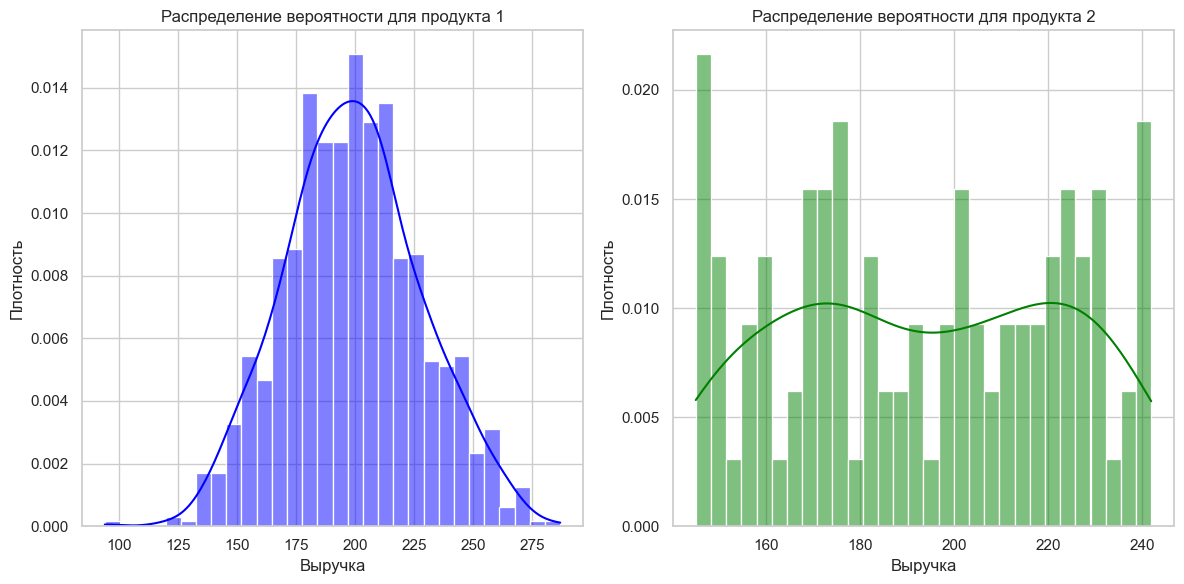

In [17]:
# Установим стиль для графиков
sns.set(style="whitegrid")

# Создаем фигуру и оси для графиков
plt.figure(figsize=(12, 6))

# Гистограмма для product1
plt.subplot(1, 2, 1)
sns.histplot(product1, kde=True, color="blue", bins=30, stat="density")
plt.title("Распределение вероятности для продукта 1")
plt.xlabel("Выручка")
plt.ylabel("Плотность")

# Гистограмма для product2
plt.subplot(1, 2, 2)
sns.histplot(product2, kde=True, color="green", bins=30, stat="density")
plt.title("Распределение вероятности для продукта 2")
plt.xlabel("Выручка")
plt.ylabel("Плотность")

# Показываем графики
plt.tight_layout()
plt.show()

**Задача 4**<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [18]:
# Для продукта 1
range_product1 = np.max(product1) - np.min(product1)
std_dev_product1 = np.std(product1)

# Для продукта 2
range_product2 = np.max(product2) - np.min(product2)
std_dev_product2 = np.std(product2)

# Результаты
print(f"Размах для продукта 1: {range_product1}")
print(f"Стандартное отклонение для продукта 1: {std_dev_product1}")

print(f"Размах для продукта 2: {range_product2}")
print(f"Стандартное отклонение для продукта 2: {std_dev_product2}")

Размах для продукта 1: 193
Стандартное отклонение для продукта 1: 28.793964489107783
Размах для продукта 2: 97
Стандартное отклонение для продукта 2: 29.589018233121557


Ответ: Разница в размахах составляет 193 - 97 = 96.<br>
Разница в стандартных отклонениях составляет 29.59 - 28.79 = 0.80.<br>
Разница в размахах и стандартных отклонениях не сходится, потому что размах чувствителен к экстремальным значениям (выбросам), тогда как стандартное отклонение более устойчиво и учитывает все данные.<br>
Причина может быть в том, что для продукта 1 есть экстремальные значения, которые увеличивают размах, но не оказывают такого же сильного воздействия на стандартное отклонение.

**Задача 5**<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [42]:
# Для продукта 1
Q1_product1 = np.percentile(product1, 25)
Q3_product1 = np.percentile(product1, 75)
IQR_product1 = Q3_product1 - Q1_product1

# Для продукта 2
Q1_product2 = np.percentile(product2, 25)
Q3_product2 = np.percentile(product2, 75)
IQR_product2 = Q3_product2 - Q1_product2

# Результаты
print(f"Межквартильный размах для продукта 1: {IQR_product1}")
print(f"Межквартильный размах для продукта 2: {IQR_product2}")

Межквартильный размах для продукта 1: 38.25
Межквартильный размах для продукта 2: 51.0


Ответ: После удаления выбросов, данные для обоих продуктов станут более сглаженными, и разброс будет более точным и менее чувствительным к экстремальным значениям.

**Задача 6**<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

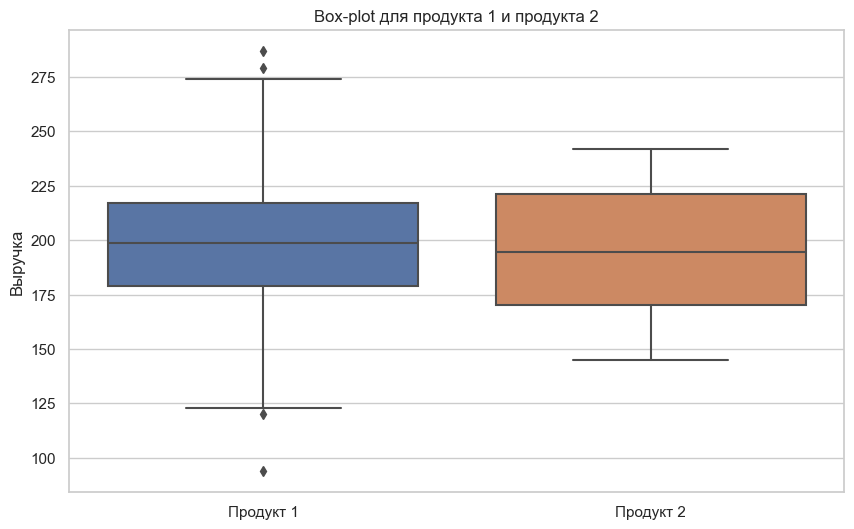

In [20]:
# Построим box-plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[product1, product2], orient='v')
plt.xticks([0, 1], ['Продукт 1', 'Продукт 2'])
plt.title('Box-plot для продукта 1 и продукта 2')
plt.ylabel('Выручка')
plt.show()

Для Продукта 1: выбросами будут считаться все значения ниже 121.625 или выше 274.625.<br>
Для Продукта 2: выбросами будут считаться все значения ниже 93.5 или выше 297.5.

**Задача 7**<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

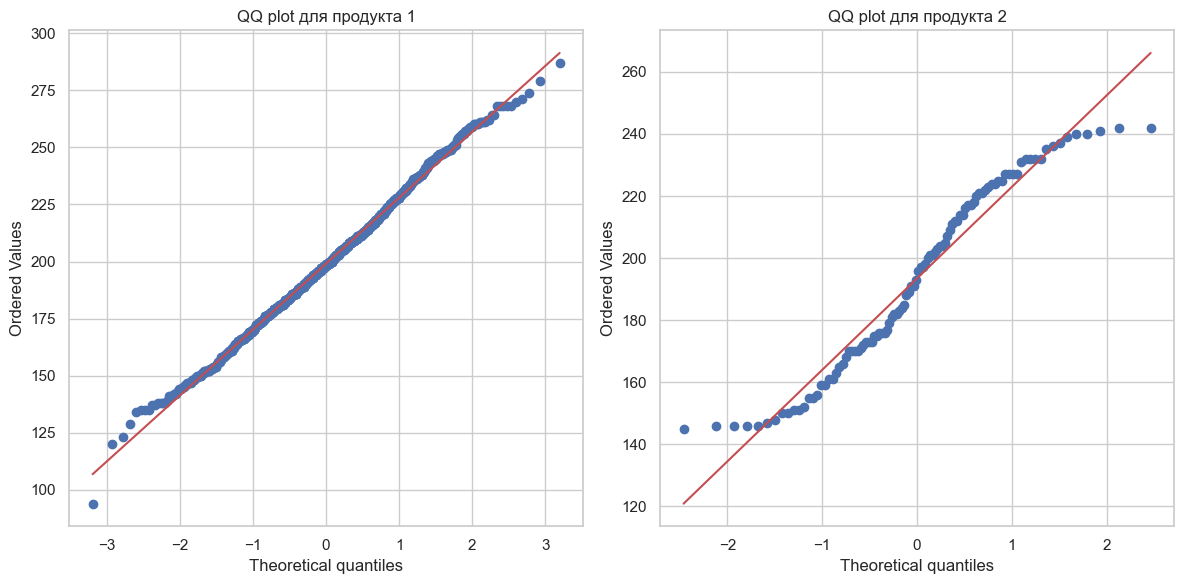

In [27]:
# Создаем фигуру для двух графиков
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# QQ plot для продукта 1
stats.probplot(product1, dist="norm", plot=ax[0])
ax[0].set_title('QQ plot для продукта 1')

# QQ plot для продукта 2
stats.probplot(product2, dist="norm", plot=ax[1])
ax[1].set_title('QQ plot для продукта 2')

# Показываем графики
plt.tight_layout()
plt.show()

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

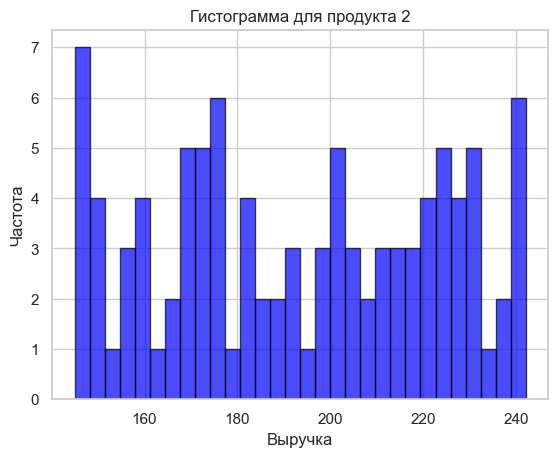

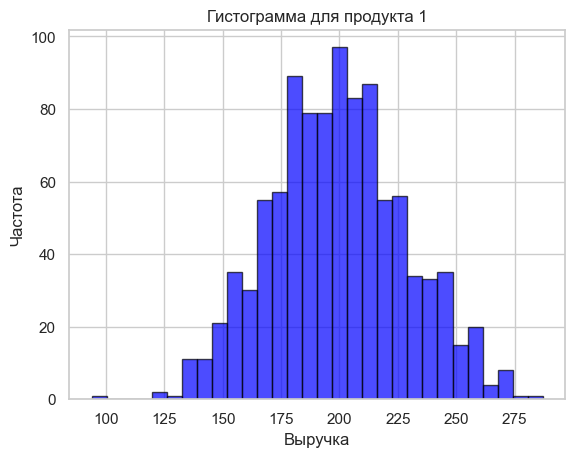

In [29]:
plt.hist(product2, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Гистограмма для продукта 2")
plt.xlabel("Выручка")
plt.ylabel("Частота")
plt.show()

plt.hist(product1, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Гистограмма для продукта 1")
plt.xlabel("Выручка")
plt.ylabel("Частота")
plt.show()

**Задача 8**<br>
И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

In [37]:
# Вычисление среднего и стандартного отклонения для продукта 1
mean_product1 = np.mean(product1)
std_product1 = np.std(product1)

# Переводим все значения продукта 1 в стандартное нормальное распределение
standardized_product1 = (product1 - mean_product1) / std_product1

# Результат:
print(standardized_product1)

[-1.07765640e-01  6.56283368e-01 -3.83066389e-02  8.29930870e-01
 -1.18438015e+00 -5.93978645e-01  2.01073388e+00  5.17365367e-01
 -7.30361393e-02  1.80235688e+00 -1.77224640e-01 -3.83066389e-02
  1.35340863e-01  1.90654538e+00 -3.85601642e-01  1.07303737e+00
  7.25742369e-01 -2.43464216e+00 -6.28708145e-01  2.14965188e+00
  1.31614388e+00 -1.07765640e-01  4.13176866e-01 -2.81413141e-01
  2.39275839e+00 -1.84424066e+00 -5.93978645e-01  1.10776687e+00
 -1.07765640e-01  6.91012869e-01  4.47906366e-01  5.52094867e-01
  6.56283368e-01  1.48979138e+00  8.99389871e-01  2.39275839e+00
  2.04799864e-01 -7.32896646e-01  5.52094867e-01  9.68848871e-01
 -6.98167146e-01  3.11523618e-02  1.00611363e-01 -1.07765640e-01
 -3.57713854e-03  6.21553868e-01 -1.18438015e+00 -5.24519644e-01
 -3.16142642e-01  1.00611363e-01  1.28141437e+00  3.11523618e-02
  6.91012869e-01  3.43717865e-01  7.60471869e-01  2.04799864e-01
  3.78447365e-01 -6.28708145e-01 -3.57713854e-03 -6.63437645e-01
  1.70070363e-01 -8.71814

Нарисуйте kdeplot нового стандартного распределения

C:\Users\Elvira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


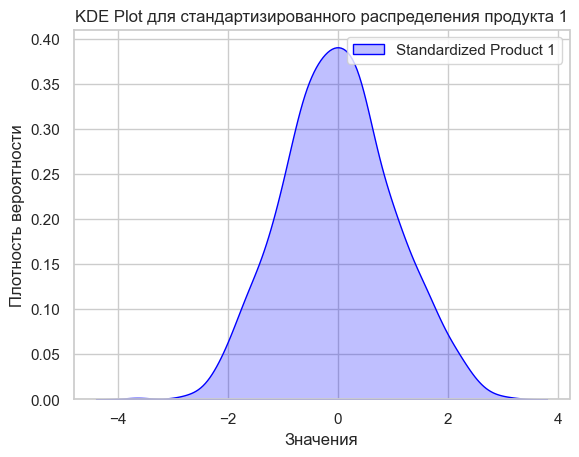

In [38]:
# Строим KDE для стандартизированных данных (standardized_product1)
sns.kdeplot(standardized_product1, fill=True, color='blue', label='Standardized Product 1')

# Настройка графика
plt.title('KDE Plot для стандартизированного распределения продукта 1')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

**Задача 9**<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

In [39]:
# Считываем параметры стандартного нормального распределения
mean_product1 = 199.1
std_product1 = 28.79

# Находим точку, соответствующую 1% вероятности слева
percentile_1 = norm.ppf(0.01, loc=mean_product1, scale=std_product1)

print(f"Точка, слева от которой 1% всей вероятности: {percentile_1:.2f}")

Точка, слева от которой 1% всей вероятности: 132.12


Первое значение в списке product1 равно 94. Когда мы преобразуем список в стандартное нормальное распределение, 94 преобразуется в -3.65<br>
Что нам говорит это число, особенно при сравнении с точкой которую мы только что подсчитали?

Ответ: Мы только что подсчитали, что точка, слева от которой находится 1% всей вероятности, равна 132.12.<br>
Это означает, что все значения меньше 132.12 находятся в нижнем 1% распределения.<br>
Число 94, преобразованное в стандартное нормальное распределение как -3.65, гораздо меньше, чем точка -2.33, которая обычно соответствует 1% в стандартном нормальном распределении.<br>

94 — это крайне низкая выручка для продукта 1, которая находится далеко от среднего и попадает в очень малую часть распределения, что соответствует выбросу в негативной области.<br>
Это значение настолько отклоняется от среднего, что его можно считать аномальным в рамках этого распределения.

**Задача 10**<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

In [40]:
mean_product2 = np.mean(product2)
print(f"Точечная оценка средней выручки продукта 2: {mean_product2}")

Точечная оценка средней выручки продукта 2: 193.5


Подсчитайте 95% доверительный интервал

In [41]:
# Стандартное отклонение выручки для продукта 2
std_dev_product2 = np.std(product2, ddof=1)

# Количество наблюдений
N_product2 = len(product2)

# Критическое значение Z для 95% доверительного интервала
z_value = 1.96

# Расчет доверительного интервала
margin_of_error = z_value * (std_dev_product2 / np.sqrt(N_product2))

# 95% доверительный интервал
lower_bound = mean_product2 - margin_of_error
upper_bound = mean_product2 + margin_of_error

print(f"95% доверительный интервал для продукта 2: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% доверительный интервал для продукта 2: [187.67, 199.33]


**Задача11**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

In [35]:
# Стандартное отклонение выборки
std_dev_product1 = np.std(product1, ddof=1)

# Количество наблюдений
n_product1 = len(product1)

# Гипотетическое среднее (по условиям задачи)
mu_0 = 197.5

# t-статистика
t_statistic = (mean_product1 - mu_0) / (std_dev_product1 / np.sqrt(n_product1))

# Степени свободы
df = n_product1 - 1

# p-значение для одностороннего теста
p_value = 1 - stats.t.cdf(t_statistic, df)

# результаты
print(f"t-статистика: {t_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")

# Решение задачи
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу. Средняя выручка продукта 1 больше 197.5.")
else:
    print("Не отклоняем нулевую гипотезу. Средняя выручка продукта 1 не больше 197.5.")

t-статистика: 1.7563
p-значение: 0.0397
Отклоняем нулевую гипотезу. Средняя выручка продукта 1 больше 197.5.


Какой это был типа АБ теста?

Ответ: Этот тест — это t-тест для одной выборки, так как мы сравниваем среднее значение выборки (выручка продукта 1) с гипотетическим значением (197.5), используя односторонний подход для проверки гипотезы о том, что среднее выручки больше 197.5.

**Задача12**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

In [36]:
# Применяем двухвыборочный t-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(product1, product2, equal_var=True)

# Выводим результаты
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средняя выручка продуктов различается.")
else:
    print("Не отвергаем нулевую гипотезу: Средняя выручка продуктов не различается.")

T-статистика: 1.8489503287555282
P-значение: 0.06473365137046305
Не отвергаем нулевую гипотезу: Средняя выручка продуктов не различается.
